# Liver Problem Prediction with Logistic Regression

### Dataset & Data Description
This data set contains liver patient records and non liver patient records collected from North East of Andhra Pradesh, India. The "Liver_Problem" column is the target variable used to divide groups into liver patient ( Liver_Problem == 1) or not ( Liver_Problem == 2).

- Liver_Problem == 1, implies the individual is a liver patient
- Liver_Problem == 2, implies the individual is not a liver patient

### Data Description:

- Age of the patient
- Gender of the patient
- Total Bilirubin
- Direct Bilirubin
- Alkaline Phosphotase
- Alamine Aminotransferase
- Aspartate Aminotransferase
- Total Protiens
- Albumin
- Albumin and Globulin Ratio

"Liver_Problem" column is the target variable used to divide groups into liver patient (liver disease) or not (no disease).
Some of the data are slightly technical, you may refer online resources to learn more about them.

## Load the necessary libraries

In [1]:
# libraries for numerical
import pandas as pd  
import numpy as np

# libraries for visualization
import matplotlib.pyplot as plt  
import seaborn as sns

# libraries for machine learning
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

# to plot the diagrams within the cells
%matplotlib inline

## Load the dataset 

In [2]:
liver_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/liver_patient_data/indian_liver_patient_dataset.csv')
liver_data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Problem
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


## Are there any missing values?

In [3]:
liver_data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Liver_Problem                 0
dtype: int64

In [4]:
liver_data.Albumin_and_Globulin_Ratio.fillna(liver_data['Albumin_and_Globulin_Ratio'].mean(), inplace=True)

In [5]:
le = LabelEncoder()
liver_data.Gender = le.fit_transform(liver_data.Gender)
liver_data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Problem
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


## Exploratory Data Analysis

In [6]:
liver_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         500 non-null    int64  
 1   Gender                      500 non-null    int32  
 2   Total_Bilirubin             500 non-null    float64
 3   Direct_Bilirubin            500 non-null    float64
 4   Alkaline_Phosphotase        500 non-null    int64  
 5   Alamine_Aminotransferase    500 non-null    int64  
 6   Aspartate_Aminotransferase  500 non-null    int64  
 7   Total_Protiens              500 non-null    float64
 8   Albumin                     500 non-null    float64
 9   Albumin_and_Globulin_Ratio  500 non-null    float64
 10  Liver_Problem               500 non-null    int64  
dtypes: float64(5), int32(1), int64(5)
memory usage: 41.1 KB


In [9]:
#sns.pairplot(liver_data, hue='Liver_Problem', kind = 'kde') 

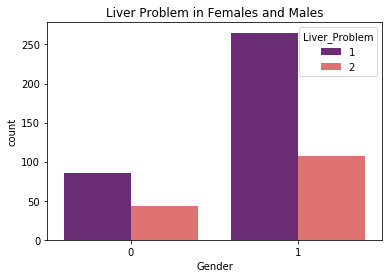

In [10]:
# create plot
sns.countplot(x = 'Gender', hue = 'Liver_Problem', data = liver_data, palette = 'magma')
plt.title('Liver Problem in Females and Males')
plt.show()

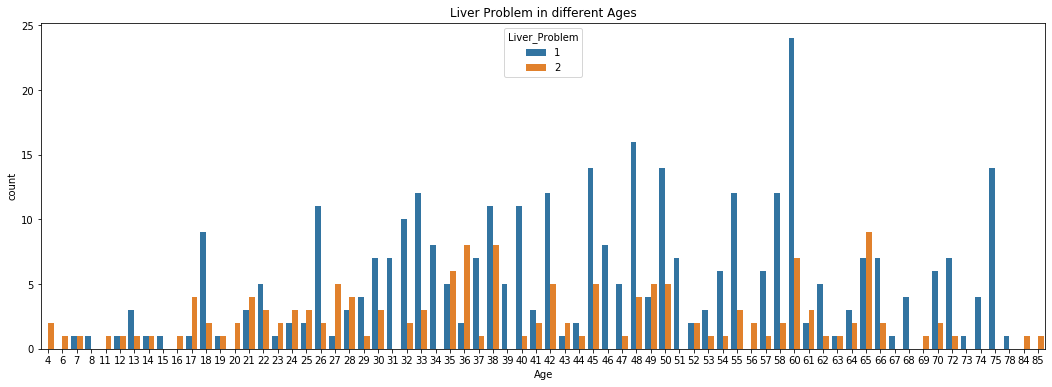

In [12]:
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(18)

# create plot
sns.countplot(x = 'Age', hue = 'Liver_Problem', data = liver_data)
plt.title('Liver Problem in different Ages')
plt.show()

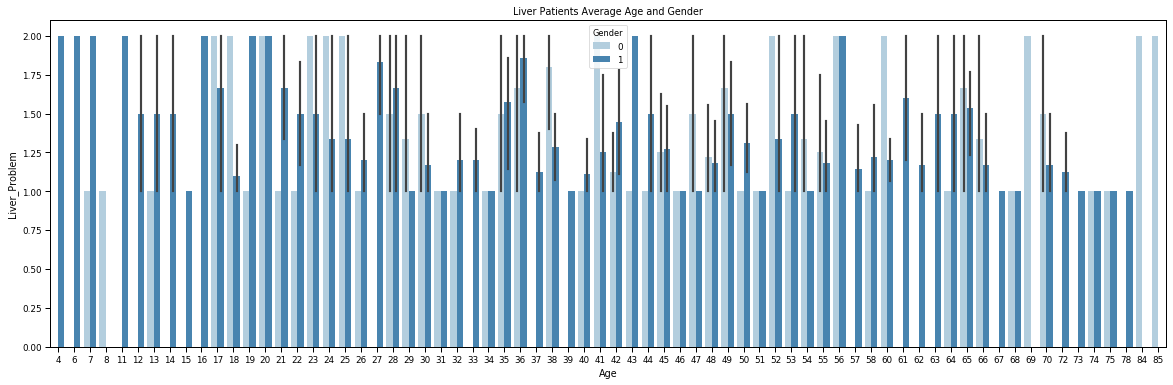

In [13]:
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(20)

sns.set_context('paper')

sns.barplot(x = 'Age', y = 'Liver_Problem', hue = 'Gender', data = liver_data, palette = 'Blues')
liver_data.groupby(['Age']).mean()

plt.title('Liver Patients Average Age and Gender')
plt.show()

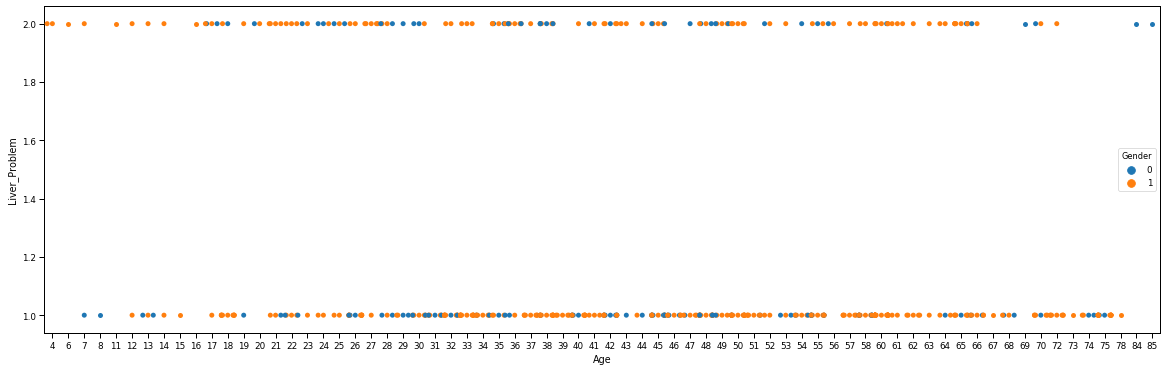

In [14]:
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(20)

sns.swarmplot(x = 'Age', y = 'Liver_Problem', hue = 'Gender', data = liver_data)

### Correlation Between the features

Let's use spearman correlation figure out any liear/non-linear relationships between the features.

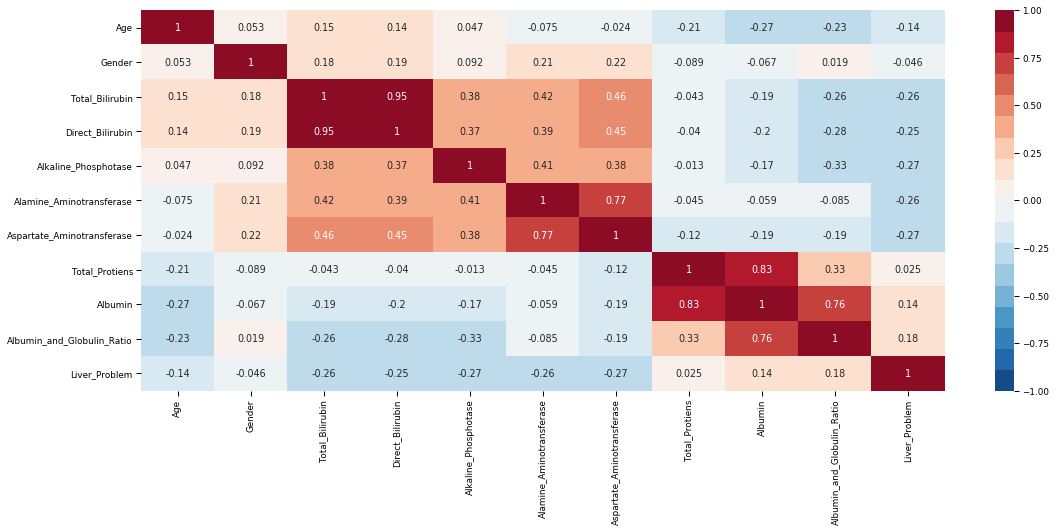

In [15]:
plt.figure(figsize=(18, 7))
sns.heatmap(liver_data.corr(method='spearman'), 
            annot=True, vmin=-1.0, vmax=1.0, cmap=sns.color_palette("RdBu_r", 18))
plt.show()

#### How about all the features vs price?

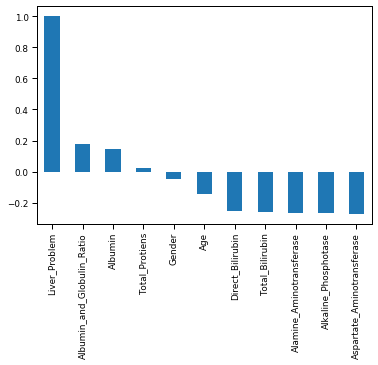

In [16]:
correlation = liver_data.corr(method='spearman')
corr = correlation.Liver_Problem.sort_values(ascending = False)
corr.plot.bar()

## Model Development

### Train Test Split

In [17]:
X = liver_data.drop('Liver_Problem', axis = 1) 
y = liver_data['Liver_Problem']

In [18]:
# train_test_split is used to split the dataset into test set and train set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [19]:
print("Original shape of dataset: {}".format(liver_data.shape))         # shape of original dataset
print("Shape of training dataset: {}".format(X_train.shape))      # shape of training dataset after split
print("Shape of testing dataset: {}".format(X_test.shape))        # shape of testing dataset after split

Original shape of dataset: (500, 11)
Shape of training dataset: (350, 10)
Shape of testing dataset: (150, 10)


### Model Building And Training 

In [20]:
# Import the Logistic Regression class from sklear.linear_model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()     # creating object 'logmodel' for LogisticRegression class
model.fit(X_train,y_train)                     # Fitting the model

C:\Users\sumai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Prediction

In [21]:
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

### Evaluation Metrics

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
cm

array([[91,  6],
       [48,  5]], dtype=int64)

Text(41.7, 0.5, 'Truth')

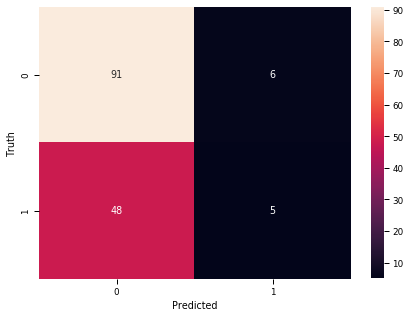

In [24]:
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [25]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
print("True Positive", tp)
print("True Negative", tn)
print("False Positive", fp)
print("False Negative", fn)

True Positive 5
True Negative 91
False Positive 6
False Negative 48


In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_test)

0.64

In [27]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_test)

0.9381443298969072

In [28]:
print("Specificity with Formulas: ", tn/(tn+fp))

Specificity with Formulas:  0.9381443298969072


In [29]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_test)

0.6546762589928058

### Test a new dataset

In [30]:
test_new = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/liver_patient_data/indian_liver_patient_new_testdataset.csv')
test_new.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,36,Male,2.8,1.5,305,28,76,5.9,2.5,0.7
1,42,Male,0.8,0.2,127,29,30,4.9,2.7,1.2
2,53,Male,19.8,10.4,238,39,221,8.1,2.5,0.4
3,32,Male,30.5,17.1,218,39,79,5.5,2.7,0.9
4,32,Male,32.6,14.1,219,95,235,5.8,3.1,1.1


In [31]:
le = LabelEncoder()
test_new.Gender = le.fit_transform(test_new.Gender)
test_new.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,36,1,2.8,1.5,305,28,76,5.9,2.5,0.7
1,42,1,0.8,0.2,127,29,30,4.9,2.7,1.2
2,53,1,19.8,10.4,238,39,221,8.1,2.5,0.4
3,32,1,30.5,17.1,218,39,79,5.5,2.7,0.9
4,32,1,32.6,14.1,219,95,235,5.8,3.1,1.1


In [32]:
Liver_Problem = model.predict(test_new)

In [33]:
res = pd.DataFrame(Liver_Problem)
res.index = test_new.index # its important for comparison
res.columns = ["Liver_Problem"]
res.to_csv("prediction_results_LP.csv")      # the csv file will be saved locally on the same location where this notebook is located.